# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


> **Note** Results shown below are simulated by means of the provided MC code improved as requested in Exercise $06.1$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In order to have a reasonable choice of the Equilibration phase, I ran a batch of short simulations of 10 blocks, each one 10 MC steps long. After 250 MC steps, i noticed that a subsequent restart did not improved the precision of the values. Then I set 250 MC steps as the length of the Equilibration phase.

I ran overnight simulation with the help of ETSFMI cluster, with $100$ blocks of $5*10^5$ steps each after the equilibration phase, for 50 different values of temperatures, using both Metropolis and Gibbs sampling algorithm. 
Results shown below fit dramatically well the theoretical curves.
Error bar are within the marker's size.

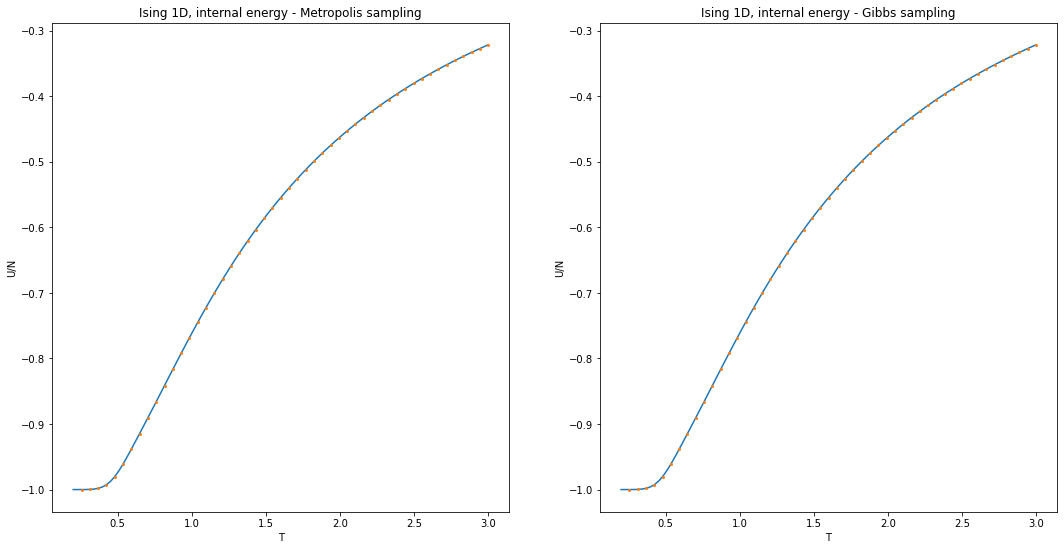

In [54]:
points=100
T = np.linspace   (0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

plt.figure(figsize=(18,9))
plt.subplot(121)
plt.plot(T, e)
plt.title('Ising 1D, internal energy - Metropolis sampling')
plt.xlabel('T')
plt.ylabel('U/N')

x, y, err = np.loadtxt("data_metro/output_enevstemp", usecols=[0,1,2], unpack=True )
plt.errorbar(x,y,yerr=err, fmt='o',ms=2)

plt.subplot(122)
plt.plot(T, e)
plt.title('Ising 1D, internal energy - Gibbs sampling')
plt.xlabel('T')
plt.ylabel('U/N')
x, y, err = np.loadtxt("data_gibbs/output_enevstemp", usecols=[0,1,2], unpack=True )
plt.errorbar(x,y,yerr=err, fmt='o',ms=2)

plt.show()


- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

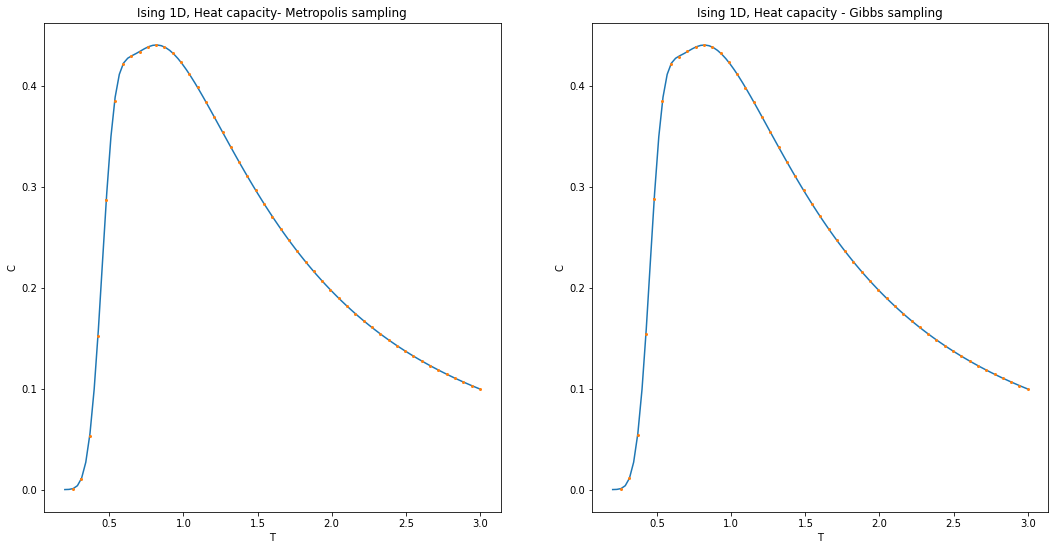

In [55]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

plt.figure(figsize=(18,9))
plt.subplot(121)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity- Metropolis sampling')
plt.xlabel('T')
plt.ylabel('C')

x, y, err = np.loadtxt("data_metro/output_heatvstemp", usecols=[0,1,2], unpack=True )
plt.errorbar(x,y,yerr=err, fmt='o',ms=2)

plt.subplot(122)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity - Gibbs sampling')
plt.xlabel('T')
plt.ylabel('C')

x, y, err = np.loadtxt("data_gibbs/output_heatvstemp", usecols=[0,1,2], unpack=True )
plt.errorbar(x,y,yerr=err, fmt='o',ms=2)

plt.show()



- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

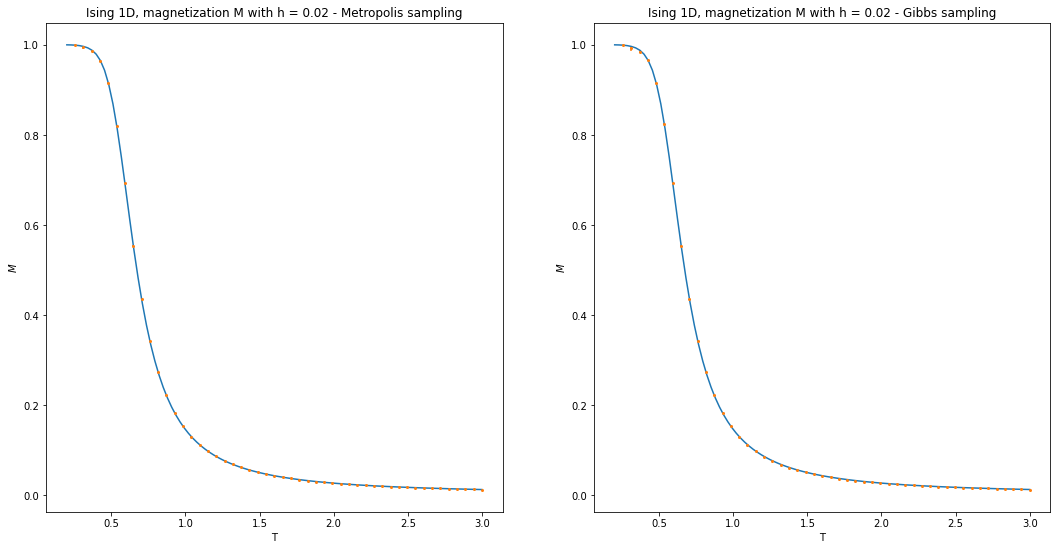

In [56]:
h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.figure(figsize=(18,9))
plt.subplot(121)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02 - Metropolis sampling')
plt.xlabel('T')
plt.ylabel('$M$')
x, y, err = np.loadtxt("data_metro/output_magvstemp", usecols=[0,1,2], unpack=True )
plt.errorbar(x,y,yerr=err, fmt='o',ms=2)

plt.subplot(122)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02 - Gibbs sampling')
plt.xlabel('T')
plt.ylabel('$M$')
x, y, err = np.loadtxt("data_gibbs/output_magvstemp", usecols=[0,1,2], unpack=True )
plt.errorbar(x,y,yerr=err, fmt='o',ms=2)
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

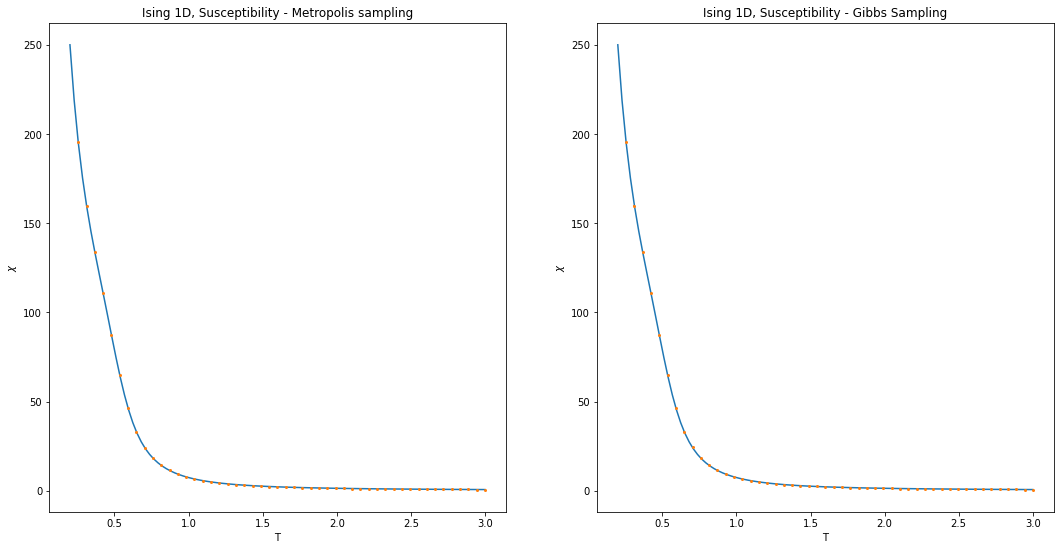

In [57]:
%matplotlib inline
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

plt.figure(figsize=(18,9))
plt.subplot(121)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility - Metropolis sampling')
plt.xlabel('T')
plt.ylabel('$\chi$')

x, y, err = np.loadtxt("data_metro/output_chivstemp", usecols=[0,1,2], unpack=True )
plt.errorbar(x,y,yerr=err, fmt='o',ms=2)

plt.subplot(122)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility - Gibbs Sampling')
plt.xlabel('T')
plt.ylabel('$\chi$')

x, y, err = np.loadtxt("data_gibbs/output_chivstemp", usecols=[0,1,2], unpack=True )
plt.errorbar(x,y,yerr=err, fmt='o',ms=2)
plt.show()
